In [1]:
import pandas as pd


In [2]:
# Ver las primeras líneas del archivo para identificar el delimitador
with open('/home/reboot-student/code/Project-Transfer-Learning/tweets_politica_kaggle.csv', 'r') as file:
    for i in range(5):  # Mostrar las primeras 5 líneas
        print(file.readline())


cuenta	partido	timestamp	tweet

a34133350b0605cb24081843f63176ca	psoe	1363973492.0	@vesteve3 @manubenas @ccoo_rm @desobediencia_ @ccoo @emparempar (Buen ánimo para esta primavera que iniciamos).

a34133350b0605cb24081843f63176ca	psoe	1364061035.0	"“@kirovast: @Hugo_Moran muy fan de la ""radicalidad social""” (Frente a la devaluación democrática)."

a34133350b0605cb24081843f63176ca	psoe	1364116804.0	@ALTAS_PRESIONES Nuevos dueños para las renovables. En ese momento ya no serán un problema sino una apuesta magnífica.

a34133350b0605cb24081843f63176ca	psoe	1364120967.0	@jumanjisolar @solartradex @josea_dolera El diferencial de precios energéticos con Alemania o Francia sigue siendo el mismo, 8-11 €/MWh.



In [3]:
import pandas as pd

csv_file_path = '/home/reboot-student/code/Project-Transfer-Learning/tweets_politica_kaggle.csv'

df = pd.read_csv(csv_file_path, delimiter='\t', on_bad_lines='skip')

df


,cuenta,partido,timestamp,tweet
0,a34133350b0605cb24081843f63176ca,psoe,1.363973e+09,@vesteve3 @manubenas @ccoo_rm @desobediencia_ ...
1,a34133350b0605cb24081843f63176ca,psoe,1.364061e+09,"“@kirovast: @Hugo_Moran muy fan de la ""radical..."
2,a34133350b0605cb24081843f63176ca,psoe,1.364117e+09,@ALTAS_PRESIONES Nuevos dueños para las renova...
3,a34133350b0605cb24081843f63176ca,psoe,1.364121e+09,@jumanjisolar @solartradex @josea_dolera El di...
4,a34133350b0605cb24081843f63176ca,psoe,1.364153e+09,“@cesarnayu: https://t.co/J4OTXj1x7w … Por fav...
...,...,...,...,...
245784,0f73ee4d01daad6c58cda2f32bfd6170,ciudadanos,1.679571e+09,Acaba la legislatura. Final de etapa y buen mo...
245785,2a5fcd1034beb5bd30bf5a1528008d81,psoe,1.679572e+09,Un placer inaugurar la jornada #NextGeneration...
245786,561b1a4d4369a0116ac5eba469f28bc0,psoe,1.679572e+09,Y esto también es el PP https://t.co/CaOTdTWnXB
245787,42acd1f0c1c51732519ad0d533573359,pp,1.679572e+09,Actualización: Los 3 violadores ya han sido pu...


In [4]:
df = df.drop(columns=['cuenta', 'timestamp'])
df

,partido,tweet
0,psoe,@vesteve3 @manubenas @ccoo_rm @desobediencia_ ...
1,psoe,"“@kirovast: @Hugo_Moran muy fan de la ""radical..."
2,psoe,@ALTAS_PRESIONES Nuevos dueños para las renova...
3,psoe,@jumanjisolar @solartradex @josea_dolera El di...
4,psoe,“@cesarnayu: https://t.co/J4OTXj1x7w … Por fav...
...,...,...
245784,ciudadanos,Acaba la legislatura. Final de etapa y buen mo...
245785,psoe,Un placer inaugurar la jornada #NextGeneration...
245786,psoe,Y esto también es el PP https://t.co/CaOTdTWnXB
245787,pp,Actualización: Los 3 violadores ya han sido pu...


In [5]:
df_conteo = df.groupby('partido')['tweet'].count().reset_index()

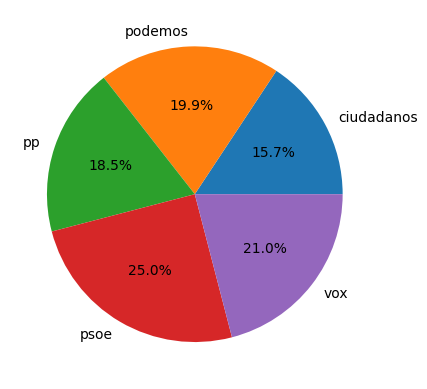

In [6]:
import matplotlib.pyplot as plt

plt.pie(df_conteo['tweet'], labels=df_conteo['partido'], autopct='%1.1f%%')
plt.show()

In [7]:
import re
import unidecode
from tqdm import tqdm

def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = unidecode.unidecode(tweet)  # Normalizar caracteres con tildes
    tweet = re.sub(r'http\S+', '', tweet)  # Eliminar URLs
    tweet = re.sub(r'@\w+', '', tweet)  # Eliminar menciones
    tweet = re.sub(r'#\w+', '', tweet)  # Eliminar hashtags
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Eliminar caracteres especiales
    return tweet.strip()

tqdm.pandas()
df['clean_tweet'] = df['tweet'].progress_apply(clean_tweet)


df[['partido', 'clean_tweet']].sample(5)

100%|████████████████████████████████| 245789/245789 [00:04<00:00, 55329.64it/s]


,partido,clean_tweet
159779,psoe,antonio lopez pinta barcelona por primera vez ...
55945,ciudadanos,estos son los que nos dan lecciones sobre dere...
152227,ciudadanos,lo mejor de esta propuesta es que contiene muc...
113447,pp,la dictadura cubana llamando al enfrentamiento...
28493,vox,esperando las declaraciones manana de iceta ab...


In [21]:
texts = df['clean_tweet']  # Cambia 'tweet_text' por el nombre correcto de la columna de texto
labels = df['partido']  # Cambia 'label' por el nombre de la columna de etiquetas

from transformers import DistilBertTokenizer

# Cargar el tokenizador
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenizar el texto
tokens = tokenizer(list(texts), padding=True, truncation=True, return_tensors="pt", max_length=512)


ImportError: Unable to convert output to PyTorch tensors format, PyTorch is not installed.

In [ ]:
from transformers import DistilBertForSequenceClassification

# Modelo preentrenado con una capa de clasificación
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)  # Cambia num_labels según tu tarea


In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Dividir datos
train_texts, val_texts, train_labels, val_labels = train_test_split(
    tokens['input_ids'], labels, test_size=0.2, random_state=42
)

# Convertir a tensores
train_dataset = TensorDataset(train_texts, torch.tensor(train_labels.values))
val_dataset = TensorDataset(val_texts, torch.tensor(val_labels.values))

# Crear DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)


In [ ]:
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
import torch

# Dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Optimizer y Loss
optimizer = AdamW(model.parameters(), lr=5e-5)
loss_fn = CrossEntropyLoss()

# Entrenamiento
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, labels = [x.to(device) for x in batch]
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader)}")
